In [1]:
import os
import numpy as np
from datetime import datetime
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
import wandb
from wandb.keras import WandbCallback

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from evtGAN import ChiScore, CrossEntropy, DCGAN, tf_utils, viz_utils, compile_dcgan

global rundir

plot_kwargs = {'bbox_inches': 'tight', 'dpi': 300}

# some static variables
paddings = tf.constant([[0,0], [1,1], [1,1], [0,0]])
var = 'wind'
conditions = "all"
im_size = (19, 23)
cwd = os.getcwd()
wd = os.path.join(cwd, "..")
indir = "/Users/alison/Documents/DPhil/multivariate/processed_wind_data"
imdir = os.path.join(wd, 'figures', 'temp')

In [15]:
train_size = 200
# load data
train_images, test_images = tf_utils.load_test_images(indir, train_size, conditions=conditions)
train_images = train_images.numpy()
test_images = test_images.numpy()

params_u10 = np.load(os.path.join(indir, f"train_{train_size}", "gev_params_u10_train.npy"))
params_v10 = np.load(os.path.join(indir, f"train_{train_size}", "gev_params_v10_train.npy"))

params_u10_test = np.load(os.path.join(indir, f"train_{train_size}", "gev_params_u10_test.npy"))
params_v10_test = np.load(os.path.join(indir, f"train_{train_size}", "gev_params_v10_test.npy"))

In [16]:
from importlib import reload
reload(tf_utils)
train_marginals = tf_utils.winds_to_marginals(train_images, (params_u10, params_v10))
test_marginals = tf_utils.winds_to_marginals(test_images, (params_u10_test, params_v10_test))


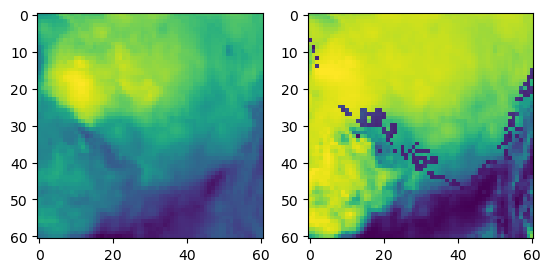

In [17]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(test_images[0, ..., 0])
axs[1].imshow(test_marginals[0, ..., 0])

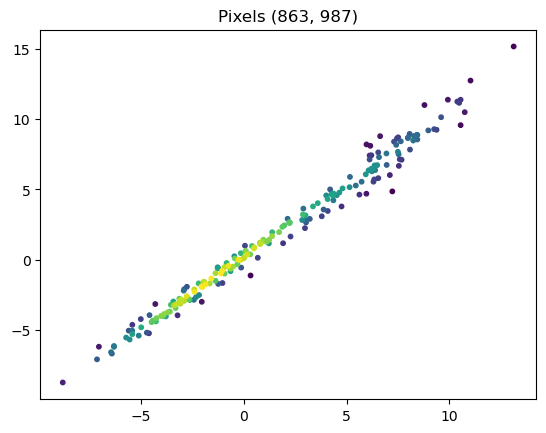

In [95]:
# : 
corrs = {'low': (2826, 3160), 'medium': (2362, 1945), 'high': (863, 987)}

reload(viz_utils)
fig, ax = plt.subplots()
viz_utils.plot_sample_density(train_images[..., 0], ax=ax, sample_pixels=corrs['high'])

In [202]:
reload(tf_utils)
tf_utils.get_ecs(train_images[..., 0], corrs["medium"], params_u10)

[<tf.Tensor: shape=(), dtype=float32, numpy=1.2358009>]

In [211]:
wandb.init()
gan = DCGAN(wandb.config)

gan.generator.load_weights("/Users/alison/Documents/DPhil/multivariate/saved_models/lilac-pine-10_generator_weights")

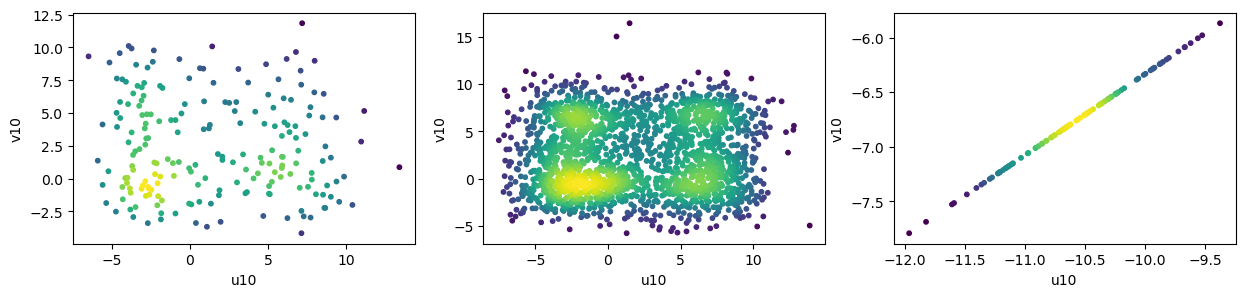

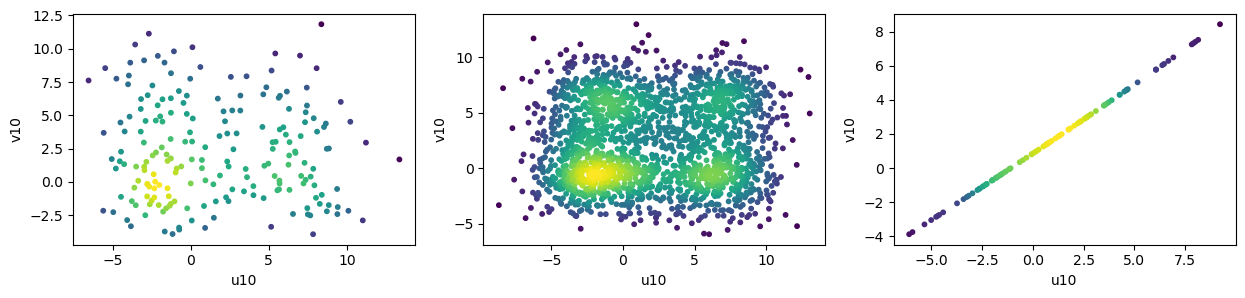

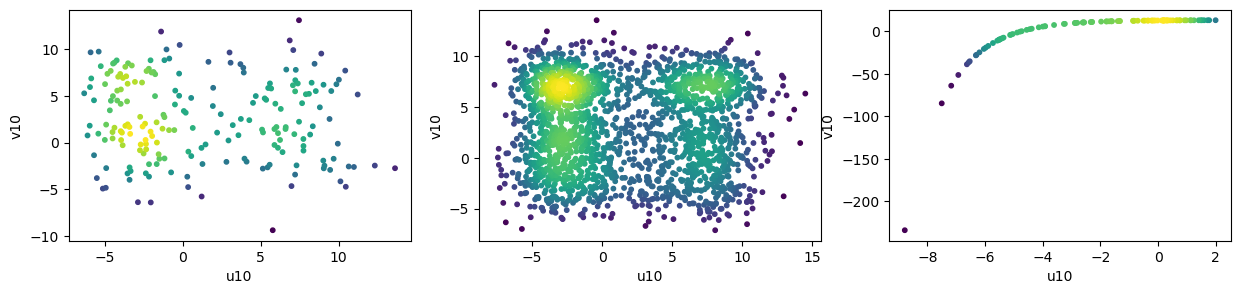

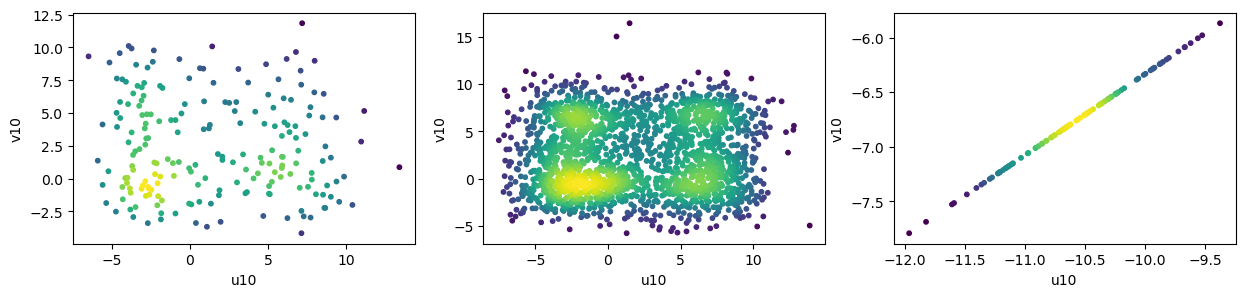

In [226]:
wandb.init()

In [233]:
fake_data = gan(1)
fake_winds = tf_utils.marginals_to_winds(fake_data, (params_u10, params_v10))

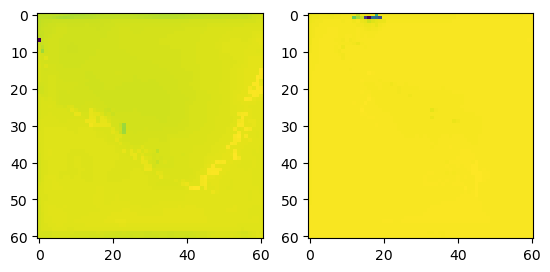

In [239]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(fake_winds[0, ..., 0])
ax[1].imshow(fake_winds[0, ..., 1])